<a href="https://colab.research.google.com/github/manisha7-ma/Pandas/blob/main/16_Pandas_Time_Series_Analysis_Part_1_DatetimeIndex_and_Resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series is a set of  data Point Indexed in time  Order


In [6]:
'''
A DateTimeIndex in Pandas is a special index type where the index is made up of datetime values. It allows powerful time-based operations like slicing by year/month (df.loc["2023-05"]), resampling, and time-series analysis. It’s created by converting a column to datetime and setting it as the index.

Bonus (1-liner for interviews):
“DateTimeIndex enables easy time-based indexing and slicing in time-series data.”
'''
import pandas as pd
df=pd.read_csv("/content/sample_data/aapl.csv",parse_dates=["Date"],index_col="Date")
df.head(5)
#parse Function passing the column to be considered as date

/tmp/ipython-input-6-1845901007.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("/content/sample_data/aapl.csv",parse_dates=["Date"],index_col="Date")


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


Date Time Index

In [9]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
#making the date column as the index
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [14]:
#advantage of making Date column the Index

df.index.min()
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
df.loc["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [16]:
#getting the average of the close price for the month of january
df.loc["2017-01"].Close.mean()

np.float64(119.57000000000001)

In [17]:
#retreiving price on any given date
df.loc["2017-01-04"]

,2017-01-04
Open,115.85
High,116.51
Low,115.75
Close,116.02
Volume,21118116.00


In [28]:
#getting price in a date range
print(df.index.min())
print(df.index.max())
#df.loc["2017-01-06":"2017-01-1"]
#the above did not run becuse the values in the date column weren't in that order
df=df.sort_index()
df.loc["2017-02-07":"2017-01-01"]

2016-07-11 00:00:00
2017-07-07 00:00:00


,Open,High,Low,Close,Volume
Date,,,,,


In [29]:
#RESAMPLING

In [31]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945
2016-07-12,97.17,97.70,97.12,97.42,24167463
2016-07-13,97.41,97.67,96.84,96.87,25892171
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-15,98.92,99.30,98.50,98.78,30136990
...,...,...,...,...,...
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557


In [33]:
#TRYING TO GET MONTHLY STOCK PRICE DATA INSTAED OF DAILY
df.Close.resample("M").mean()

/tmp/ipython-input-33-4019909095.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Close.resample("M").mean()


,Close
Date,
2016-07-31,99.473333
2016-08-31,107.665217
2016-09-30,110.857143
2016-10-31,115.707143
2016-11-30,110.154286
2016-12-31,114.335714
2017-01-31,119.570000
2017-02-28,133.713684
2017-03-31,140.617826


In [35]:
#making it quarterly
df.Close.resample("W").mean()

,Close
Date,
2016-07-17,97.7680
2016-07-24,99.5500
2016-07-31,101.1020
2016-08-07,105.9340
2016-08-14,108.2580
2016-08-21,109.3040
2016-08-28,107.9800
2016-09-04,106.6760
2016-09-11,106.1775


/tmp/ipython-input-38-3266234763.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.Close.resample("Q").mean().plot()


<Axes: xlabel='Date'>

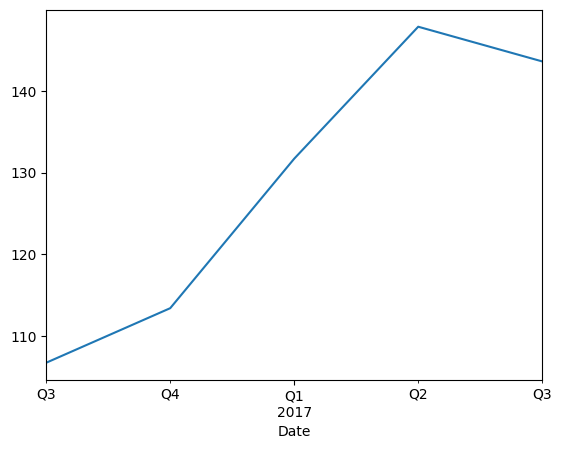

In [38]:

#Plotting it in a Chart form
%matplotlib inline
df.Close.resample("Q").mean().plot()

<Axes: xlabel='Date'>

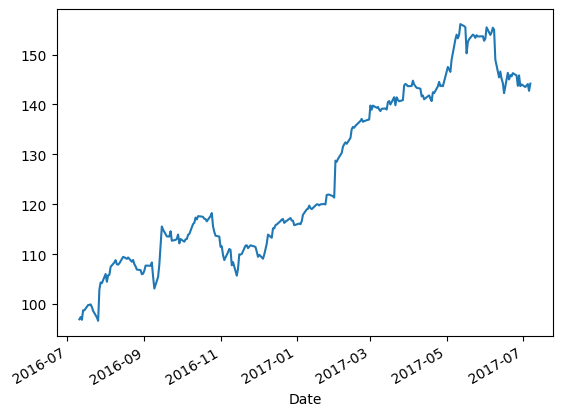

In [40]:
df.Close.plot()